In [52]:
import torch
import torchvision
import torchvision.transforms as transforms

In [53]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Resize(32),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


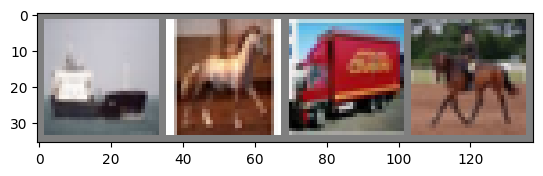

ship  horse truck horse


In [54]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [55]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3, padding = 1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding = 1)
        self.conv4 = nn.Conv2d(256, 256, 3, padding = 1)
        self.conv5 = nn.Conv2d(256, 512, 3, padding = 1)
        self.conv6 = nn.Conv2d(512, 512, 3, padding = 1)
        self.fc1 = nn.Linear(512 * 1 * 1, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 112*112*64
        x = self.pool(F.relu(self.conv2(x))) # 56*56*128
        x = F.relu(self.conv3(x)) # 56*56*256
        x = self.pool(F.relu(self.conv4(x))) # 28*28*256
        x = F.relu(self.conv5(x)) # 28*28*512
        x = self.pool(F.relu(self.conv6(x))) # 14*14*512
        x = F.relu(self.conv6(x)) # 14*14*512
        x = self.pool(F.relu(self.conv6(x))) # 7*7*512
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.softmax(x)
        return x


net = Net()

In [56]:
from torchvision import models
from torchsummary import summary

vgg = Net()
summary(vgg, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
         MaxPool2d-2           [-1, 64, 16, 16]               0
            Conv2d-3          [-1, 128, 16, 16]          73,856
         MaxPool2d-4            [-1, 128, 8, 8]               0
            Conv2d-5            [-1, 256, 8, 8]         295,168
            Conv2d-6            [-1, 256, 8, 8]         590,080
         MaxPool2d-7            [-1, 256, 4, 4]               0
            Conv2d-8            [-1, 512, 4, 4]       1,180,160
            Conv2d-9            [-1, 512, 4, 4]       2,359,808
        MaxPool2d-10            [-1, 512, 2, 2]               0
           Conv2d-11            [-1, 512, 2, 2]       2,359,808
           Conv2d-12            [-1, 512, 2, 2]       2,359,808
        MaxPool2d-13            [-1, 512, 1, 1]               0
           Linear-14                  [

In [57]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
#         print(f"Iteration - {i}")
        if i % 50 == 49:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 0.058
[1,   100] loss: 0.058
[1,   150] loss: 0.058
[1,   200] loss: 0.058
[1,   250] loss: 0.058
[1,   300] loss: 0.058
[1,   350] loss: 0.058
[1,   400] loss: 0.058
[1,   450] loss: 0.058
[1,   500] loss: 0.058
[1,   550] loss: 0.058
[1,   600] loss: 0.058
[1,   650] loss: 0.058
[1,   700] loss: 0.058
[1,   750] loss: 0.058
[1,   800] loss: 0.058
[1,   850] loss: 0.058
[1,   900] loss: 0.058
[1,   950] loss: 0.058
[1,  1000] loss: 0.058
[1,  1050] loss: 0.058
[1,  1100] loss: 0.058
[1,  1150] loss: 0.058
[1,  1200] loss: 0.058
[1,  1250] loss: 0.058
[1,  1300] loss: 0.058
[1,  1350] loss: 0.058
[1,  1400] loss: 0.058
[1,  1450] loss: 0.058
[1,  1500] loss: 0.058
[1,  1550] loss: 0.058
[1,  1600] loss: 0.058
[1,  1650] loss: 0.058
[1,  1700] loss: 0.058
[1,  1750] loss: 0.058
[1,  1800] loss: 0.058
[1,  1850] loss: 0.058


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

In [ ]:
outputs

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')